In [ ]:
import pandas as pd 
data = pd.read_csv("../data/train.csv")
df = data.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Valeurs manquantes : 
Age : approximativement 20% des valeurs sont  nulles
cabin : 77% des valeurs sont nulles  
embarked : seulement 0.002% des valeurs sont nulles
Toutes les autres colonnes ont toutes leur valeurs non nulles
#### diférents types de variables :
le dataset possède 7 variables numériques et 5 variables qualtitatives
 


In [53]:
df = df.drop('PassengerId', axis = 1)

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <BarContainer object of 30 artists>)

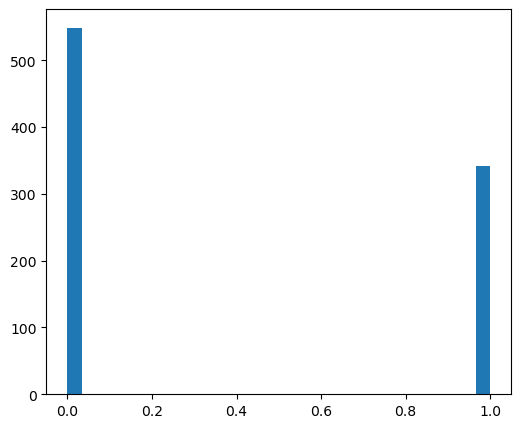

In [54]:
import matplotlib.pyplot as plt 
import seaborn as sns 
label = df['Survived']
plt.figure(figsize=(6,5))
plt.hist(label, bins= 30)

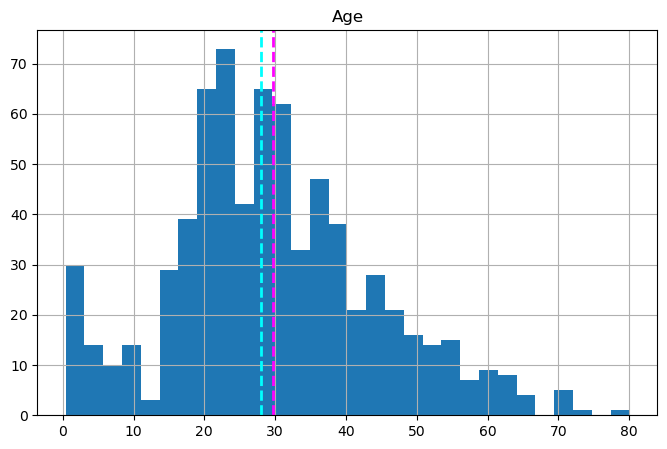

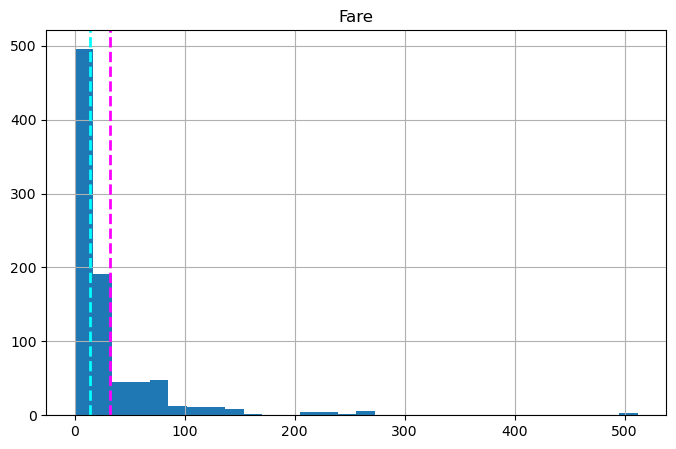

In [55]:
numeric_features = ['Age','Fare']



for col in numeric_features :
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    features = df[col]
    features.hist(bins=30, ax=ax)
    ax.axvline(features.mean(), color ='magenta', linestyle ='dashed', linewidth = 2 )
    ax.axvline(features.median(), color = 'cyan', linestyle = 'dashed', linewidth =2)
    ax.set_title(col)

In [56]:
skew_value = df[numeric_features].skew()
print(f"Coefficient d'assymétrie :\n {skew_value}")

Coefficient d'assymétrie :
 Age     0.389108
Fare    4.787317
dtype: float64


On constate que seul la variable age suis une distribution symétrique  {son coefficient de symétrie se trouve entre [-0.5, 0.5]}
la variable Fare par contre, étant assymétriques, il est donc nécessaire de lui appliquer une transformation logarithmique.

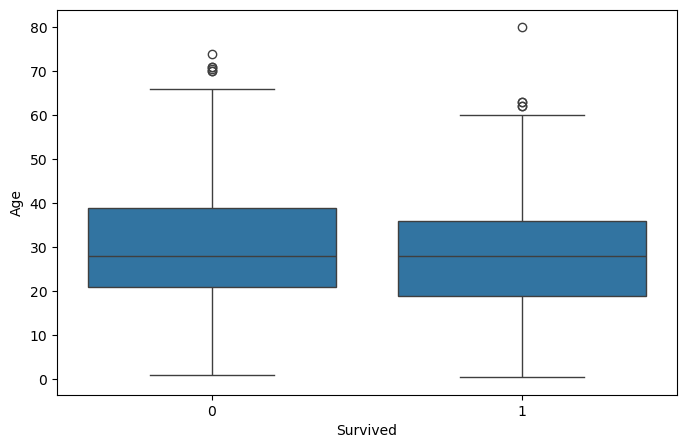

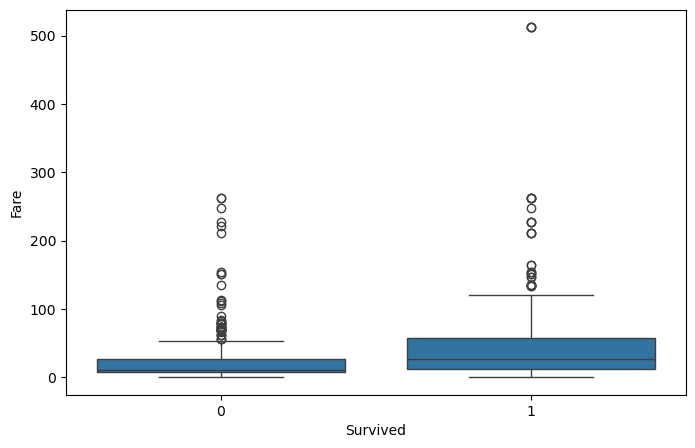

In [57]:
import seaborn as sns
for col in numeric_features :
    figure = plt.figure(figsize =(8,5))
    ax = fig.gca()
    features = df[col]
    sns.boxplot(data=df, x='Survived', y=features)


on constate de l'analyse de ces boites que : 
1-L'âge médian des personnes qui survivent est presque égale à celle des personnes qui ne survivent pas. cependant, à part quelques valeurs abérantes, on constate que l'intervalle d'âge pour les personnes mortes vas de 0 à 69 ans environs, tandisque pour les survivants, cet intervalle vas de 0 à 60 ans environs; on pourrait donc penser que les jeunes avaient plus de chances de survie que les vielles personnes.
2-En ce qui concerne le prix du ticket (Fare); on constate que mis à part de nombreux valeurs abérentes, un ticket plus chère garanti une meilleur chance de survie. 



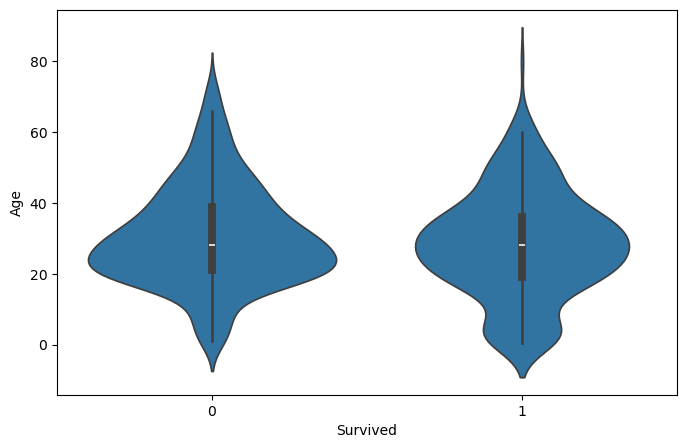

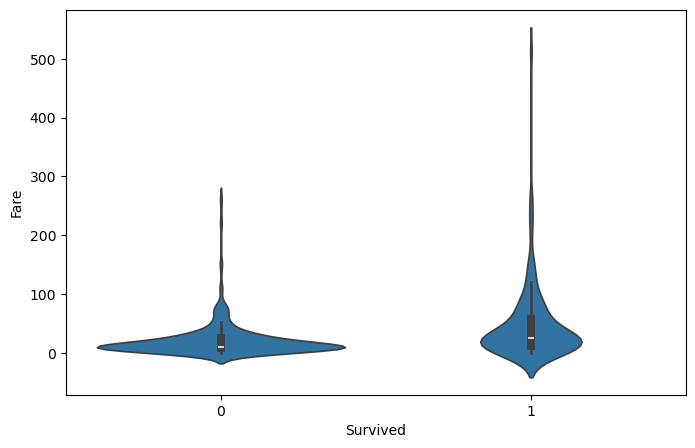

In [58]:
for col in numeric_features :
    figure = plt.figure(figsize =(8,5))
    ax = fig.gca()
    features = df[col]
    sns.violinplot(data=df, x='Survived', y=features)

Au vu de ces nouvelles visualisations, on constate plus de densité dans les âges Jeunes (0-10 ans). Par conséquent : 
-Les enfants (0-10 ans) ont effectivement + de chances de survie
-Les adultes (20-40 ans) : distributions très similaires
-Les personnes âgées (>60 ans) : légèrement désavantagées

#### CONCULSIONS: 
**Age** : 
- Discriminant pour enfants < 10 ans
- Peu discriminant pour adultes
- **Décision** : À GARDER (créer feature "IsChild" plus tard)

**Fare** :
- Très discriminant (médiane 2x plus élevée pour survivants)
- **Décision** : À GARDER absolument, Corrélé avec Pclass
- **Note** : Traiter les outliers plus tard

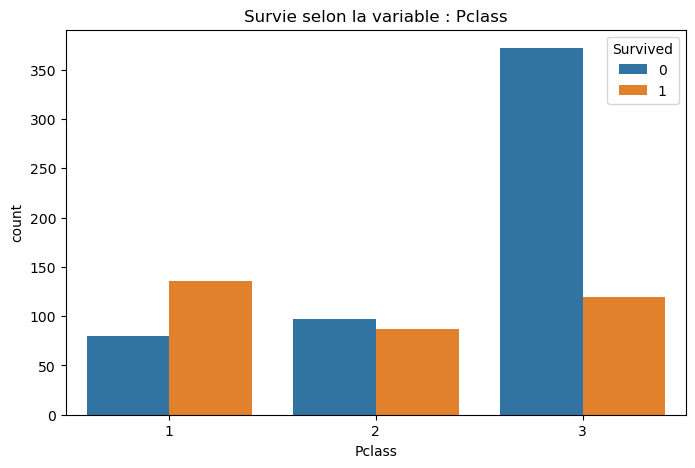

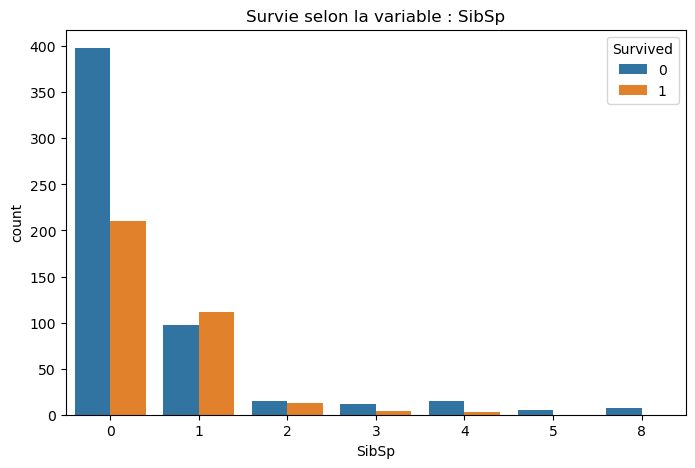

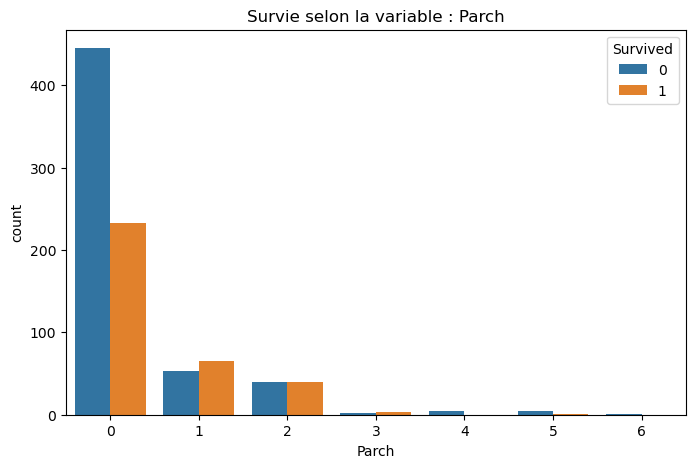

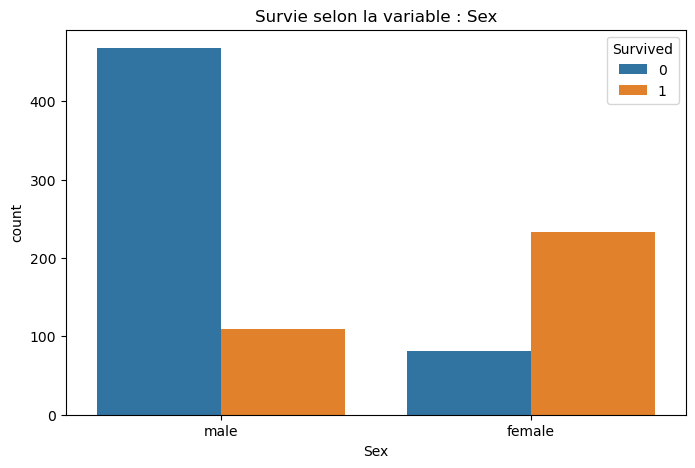

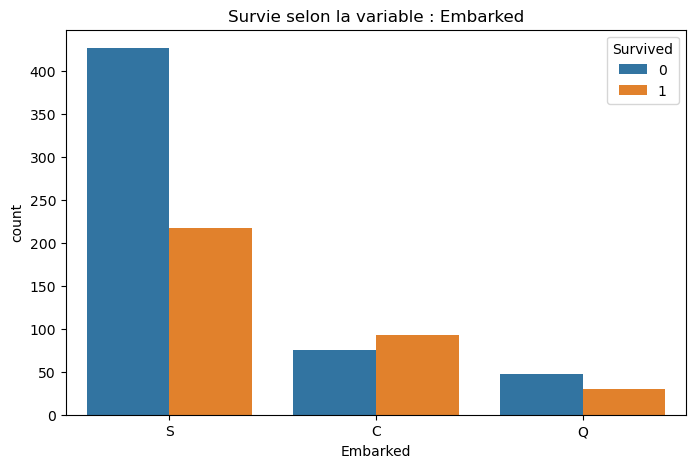

In [64]:
categorial_features = ['Pclass', 'SibSp', 'Parch', 'Sex', 'Embarked']
for col in categorial_features:
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    features = df[col]
    sns.countplot(data=df, x= features, hue='Survived')
    plt.title(f'Survie selon la variable : {col}')


In [65]:
 
for col in categorial_features:
    cross_tab = pd.crosstab(df[col], df['Survived'])
    print(f"\n {cross_tab}")


 Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119

 Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0

 Survived    0    1
Parch             
0         445  233
1          53   65
2          40   40
3           2    3
4           4    0
5           4    1
6           1    0

 Survived    0    1
Sex               
female     81  233
male      468  109

 Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217


En ce qui concerne les variables catégorielle :
1- le sex est une variables très importante car on constate que chez les femmes, le taux de survie est plus important que chez les hommes (ayant un fort taux de mortatlité), les femme ont donc plus de chance de survivre que les hommes 

2- On constate que les passagers de la classe 1 on plus de chace de survie que les autres passagers. La variable Pclass est donc une variable importante pour notre modèle 

3- le nombre de soeur/frère influence également la survie des passagers , car en effet, on constate que les gens seul sont plus en proie à la mort que les personnes accompagnées. Cependant, parmis les personnes accompagnées, il est préférables d'être accompagné d'une seule personnes car ceux qui ont une personne avec eux ont plus de chance de survie; plus le nombre de personne qui vous accompagne est élevé et plus vos chances de survie réduisent.(variables SibSp  et Parch). il faudra créer une nouvelle variable, familySize plutard 

4- la vaiable Embarked est aussi une variable important car d'après les graphiques, les personnes ayant embarqué au port "C" ont plus de chance de survie que les autres , le pire port d'embarquement étant le port "S". 
cependant on pourraît ce poser une question : le port d'embarquement est il vraiment important ? n'est t'il pas plutôt liée à la classe ? pour ce faire, visualisons la relation entre : Embarked et Pclass. 

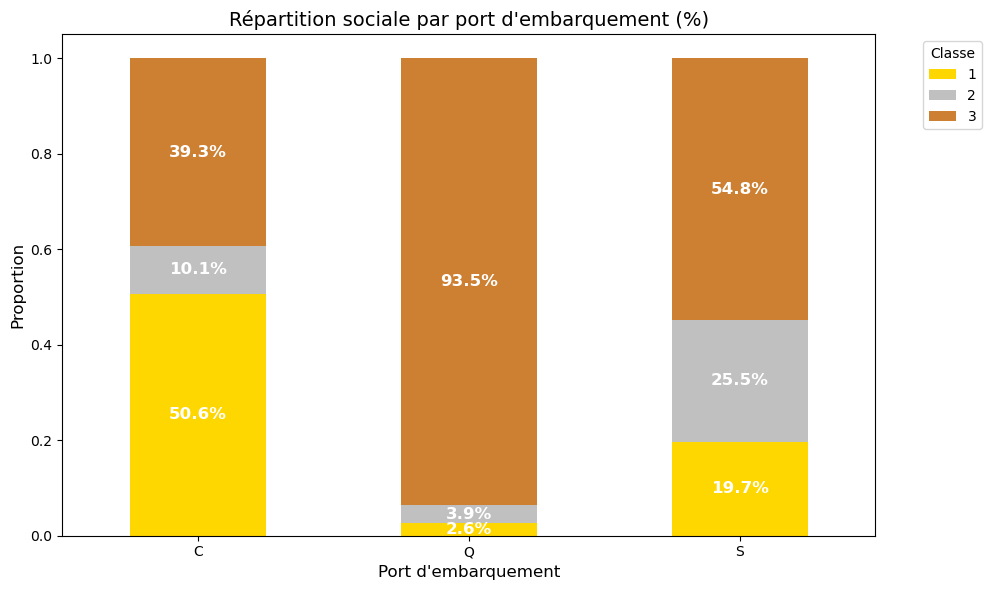

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Préparation du tableau croisé normalisé (en proportions de 0 à 1)
ct = pd.crosstab(df['Embarked'], df['Pclass'], normalize='index')

# 2. Création du graphique en barres empilées
ax = ct.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ffd700', '#c0c0c0', '#cd7f32'])

# 3. Ajout des pourcentages sur chaque segment
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0: # N'affiche le texte que si le segment existe
        ax.text(x + width/2, 
                y + height/2, 
                f'{height:.1%}', 
                horizontalalignment='center', 
                verticalalignment='center',
                fontsize=12,
                fontweight='bold',
                color='white')

plt.title("Répartition sociale par port d'embarquement (%)", fontsize=14)
plt.xlabel("Port d'embarquement", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.legend(title='Classe', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


ainsi on peux clairement voir que 50% des riches (classe 1) embarquent au point "C" , 93% des gens de la classe 3 embarquent au point "Q", et 54% au point "S". Celà viens donc confirmer la corrélation entre les variables Embarked er Pclass. 
En effet la variable Embarked seule n'est pas un prédicteur direct de survie ; son importance vient du fait qu'elle est intimement liée à Pclass.

Text(0.5, 1.0, 'Survie celon la variable Cabin')

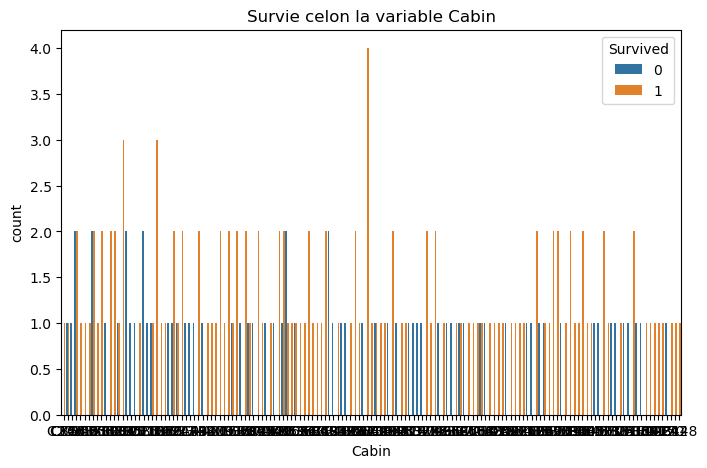

In [69]:
fig = plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Cabin', hue='Survived')
plt.title("Survie celon la variable Cabin")

Text(0.5, 1.0, 'Survie celon la variable HasCabin')

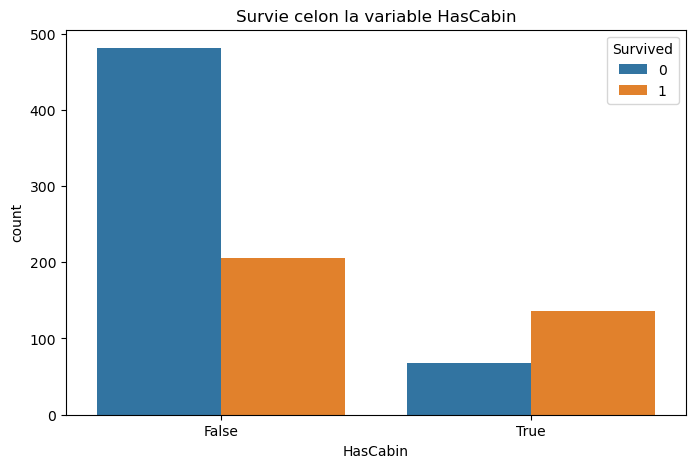

In [72]:
df['HasCabin'] = df['Cabin'].notna()
fig = plt.figure(figsize=(8,5))
sns.countplot(data=df, x='HasCabin', hue='Survived')
plt.title("Survie celon la variable HasCabin")

On constate donc que les passagers avec des cabine assignée avaient plus de chance de survie que les passagers auxquels aucune cabine n'avait été assignée

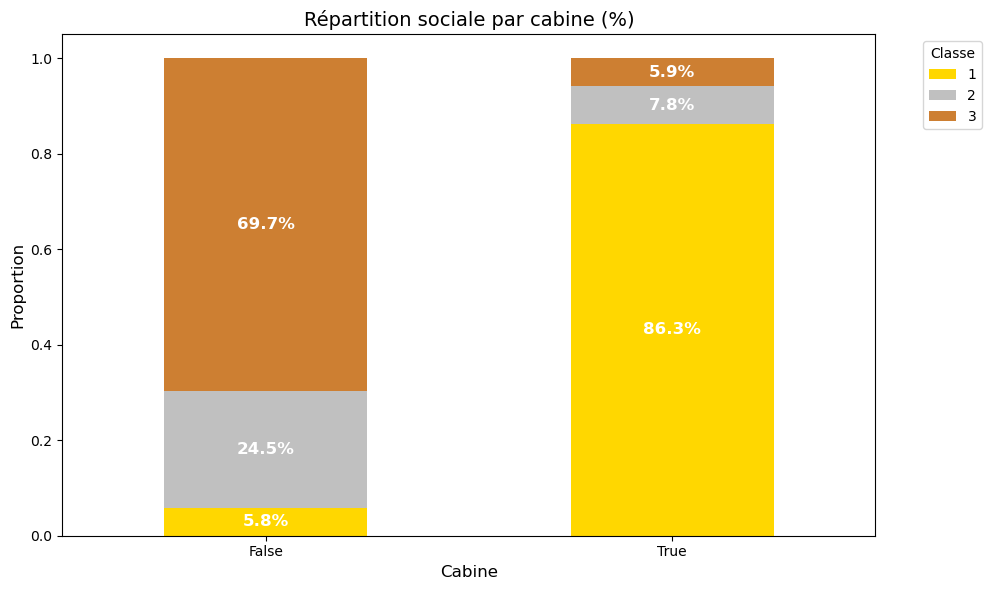

In [73]:
ct = pd.crosstab(df['HasCabin'], df['Pclass'], normalize='index')


ax = ct.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ffd700', '#c0c0c0', '#cd7f32'])


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0: # N'affiche le texte que si le segment existe
        ax.text(x + width/2, 
                y + height/2, 
                f'{height:.1%}', 
                horizontalalignment='center', 
                verticalalignment='center',
                fontsize=12,
                fontweight='bold',
                color='white')

plt.title("Répartition sociale par cabine (%)", fontsize=14)
plt.xlabel("Cabine", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.legend(title='Classe', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


on voit bien que la majorité des personnes qui se sont vu assigner une cabine sont des personnes de la classe 1. Cependant il y as quelques exceptions, mais celà suffit t'il pour garder cette variable ? 
- **ma conclusion** : Supprimer la variable cabin et la variable HasCabin  